# Pandas.groupby(), Lambda Functions, & Pivot Tables

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-this-data" data-toc-modified-id="About-this-data-1">About this data</a></span><ul class="toc-item"><li><span><a href="#Getting-oriented-with-the-data" data-toc-modified-id="Getting-oriented-with-the-data-1.1">Getting oriented with the data</a></span></li></ul></li><li><span><a href="#Sampling-and-sorting-data" data-toc-modified-id="Sampling-and-sorting-data-2">Sampling and sorting data</a></span><ul class="toc-item"><li><span><a href="#.sample()" data-toc-modified-id=".sample()-2.1">.sample()</a></span></li><li><span><a href="#.sort_values()" data-toc-modified-id=".sort_values()-2.2">.sort_values()</a></span></li></ul></li><li><span><a href="#Lambda-Functions" data-toc-modified-id="Lambda-Functions-3">Lambda Functions</a></span><ul class="toc-item"><li><span><a href="#Calculating-percentages" data-toc-modified-id="Calculating-percentages-3.1">Calculating percentages</a></span></li></ul></li><li><span><a href="#Grouping-data-by-categorical-values" data-toc-modified-id="Grouping-data-by-categorical-values-4">Grouping data by categorical values</a></span><ul class="toc-item"><li><span><a href="#.groupby()" data-toc-modified-id=".groupby()-4.1">.groupby()</a></span></li></ul></li><li><span><a href="#Plotting-grouped-data" data-toc-modified-id="Plotting-grouped-data-5">Plotting grouped data</a></span><ul class="toc-item"><li><span><a href="#Customizing-plots-with-.plot()-parameters" data-toc-modified-id="Customizing-plots-with-.plot()-parameters-5.1">Customizing plots with .plot() parameters</a></span></li><li><span><a href="#Practice-Problem" data-toc-modified-id="Practice-Problem-5.2">Practice Problem</a></span></li></ul></li><li><span><a href="#Pivot-tables" data-toc-modified-id="Pivot-tables-6">Pivot tables</a></span><ul class="toc-item"><li><span><a href="#Reasons-for-delays" data-toc-modified-id="Reasons-for-delays-6.1">Reasons for delays</a></span></li><li><span><a href="#Practice-Problem" data-toc-modified-id="Practice-Problem-6.2">Practice Problem</a></span></li></ul></li></ul></div>

### About this data

In this lesson, you'll use records of United States domestic flights from the US Department of Transportation. It includes a record of each flight that took place from January 1-15 of 2015.

Column Name | Description
:-----------|:-----------
FlightDate | Flight Date (yyyymmdd)
UniqueCarrier | Unique Carrier Code
FlightNum | Flight Number (Flights on different days may have the same flight number)
Origin | Origin Airport
Dest | Destination Airport
DepDelay | Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
ArrDelay | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
Cancelled | Cancelled Flight Indicator (1=Yes)
CarrierDelay | Carrier Delay, in Minutes
WeatherDelay | Weather Delay, in Minutes
NASDelay | National Air System Delay, in Minutes
SecurityDelay | Security Delay, in Minutes
LateAircraftDelay | Late Aircraft Delay, in Minutes

**Carrier Codes**

Code | Carrier
:----|:-------
AA | American Airlines Inc.
OO | SkyWest Airlines Inc.
DL | Delta Air Lines Inc.
NK | Spirit Air Lines
HA | Hawaiian Airlines Inc.
WN | Southwest Airlines Co.
B6 | JetBlue Airways
US | US Airways Inc.
AS | Alaska Airlines Inc.
MQ | Envoy Air
F9 | Frontier Airlines Inc.
VX | Virgin America
EV | ExpressJet Airlines Inc.
UA | United Air Lines Inc.

#### Getting oriented with the data

In [14]:
import pandas as pd
import numpy as np

In [15]:
# Give the DataFrame a variable name and preview the first five rows
data = pd.read_csv('/users/bm/downloads/python-for-data-analysis/us_flights.csv')

# Replace missing values
data = data.fillna(np.nan)

data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0


### Sampling and sorting data

#### .sample()

> The .sample() method lets you get a random set of rows of a DataFrame. Set the parameter n= equal to the number of rows you want. Sampling the dataset is one way to efficiently explore what it contains, and can be especially helpful when the first few rows all look similar and you want to see diverse data.

In [16]:
data.sample(n=5)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
41082,2015-01-05 00:00:00,DL,2371.0,MSN,DTW,28.0,0.0,311.0,0.0,0.0,28.0,0.0,0.0,75.0
196282,2015-01-11 00:00:00,MQ,3321.0,CWA,ORD,51.0,0.0,212.0,16.0,0.0,0.0,35.0,0.0,103.0
144384,2015-01-04 00:00:00,UA,1148.0,IAD,SFO,-7.0,0.0,2419.0,NaN,NaN,NaN,NaN,NaN,355.0
124851,2015-01-06 00:00:00,OO,5507.0,DEN,ASE,11.0,0.0,125.0,NaN,NaN,NaN,NaN,NaN,41.0
42364,2015-01-06 00:00:00,DL,1720.0,PHX,SLC,-11.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN,92.0


#### .sort_values()

**Example**

The values in the `arr_delay` column represent the number of minutes a given flight is delayed. Sort by that column in descending order to see the ten longest-delayed flights. Note that values of 0 indicate that the flight was on time:

In [17]:
data.sort_values(by='arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,2015-01-11 00:00:00,AA,1595.0,AUS,DFW,1444.0,0.0,190.0,1444.0,0.0,0.0,0.0,0.0,59.0
10214,2015-01-13 00:00:00,AA,1487.0,OMA,DFW,1392.0,0.0,583.0,1392.0,0.0,0.0,0.0,0.0,117.0
12430,2015-01-03 00:00:00,AA,1677.0,MEM,DFW,1384.0,0.0,432.0,1380.0,0.0,0.0,4.0,0.0,104.0
8443,2015-01-04 00:00:00,AA,1279.0,OMA,DFW,1237.0,0.0,583.0,1222.0,0.0,15.0,0.0,0.0,102.0
10328,2015-01-05 00:00:00,AA,1495.0,EGE,DFW,1187.0,0.0,721.0,1019.0,0.0,168.0,0.0,0.0,127.0
36570,2015-01-04 00:00:00,DL,1435.0,MIA,MSP,1174.0,0.0,1501.0,1174.0,0.0,0.0,0.0,0.0,231.0
36495,2015-01-04 00:00:00,DL,1367.0,ROC,ATL,1138.0,0.0,749.0,1112.0,0.0,0.0,26.0,0.0,171.0
59072,2015-01-14 00:00:00,DL,1687.0,SAN,MSP,1084.0,0.0,1532.0,1070.0,0.0,0.0,14.0,0.0,240.0
32173,2015-01-05 00:00:00,AA,970.0,LAS,LAX,1042.0,0.0,236.0,1033.0,0.0,9.0,0.0,0.0,66.0
56488,2015-01-12 00:00:00,DL,2117.0,ATL,COS,1016.0,0.0,1184.0,1016.0,0.0,0.0,0.0,0.0,193.0


### Lambda Functions

**Example**

To segment flights into two categories: **delayed** and **not delayed** we could use one of the methods below:

**Method 1:** Create a function, then use the `.apply()` method

In [18]:
def is_delayed(x):
    return x > 0

data['delayed'] = data['arr_delay'].apply(is_delayed)

**Method 2:** The function used above could be written more quickly as a **lambda function**, or a function without a name.

In [19]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)

* `lambda` - this is a lambda function
* `x:` - the parameter name within the function
* `x > 0` - what to do with the parameter

#### Calculating percentages

To get some information about the aggregate trends in flight delays:

In [20]:
# Count values in 'delayed' column to see what proportion of flights are delayed
data['delayed'].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [21]:
# Calculate the percentage of flights that were delayed
not_delayed = data['delayed'].value_counts()[0] # first value of the result above
delayed = data['delayed'].value_counts()[1] # second value of the result above
total_flights = not_delayed + delayed # total count of flights
print(float(delayed) / total_flights) # converting to float to get float result

0.4890659711202793


### Grouping data by categorical values

#### .groupby()

The `.groupby()` function allows us to group records into buckets by categorical values, such as carrier, origin, and destination in this dataset.

In [22]:
# To compare delays across airlines
group_by_carrier = data.groupby(['unique_carrier', 'delayed'])

Think of `groupby()` as splitting the dataset data into buckets by carrier `(‘unique_carrier’)`, and then splitting the records inside each carrier bucket into delayed or not delayed `(‘delayed’)`. The result is assigned to the `group_by_carrier` variable.

In [23]:
group_by_carrier

The `group_by_carrier` variable is a `DataFrameGroupBy` object. You can think of that as instructions on how to group, but without instructions on how to display values. You need to provide instructions on what values to display.

In [24]:
# Use .size() to count the number of rows in each grouping
group_by_carrier.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

Use pandas `.unstack()` method to convert the results into a more readable format and store that as a new variable 

In [25]:
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


See [Wes McKinney's blog post on groupby](http://wesmckinney.com/blog/groupby-fu-improvements-in-grouping-and-aggregating-data-in-pandas/) for more examples and explanation.

### Plotting grouped data

Use a new parameter in `.plot()` to stack the values vertically (instead of allowing them to overlap) called `stacked=True`:

<AxesSubplot:ylabel='unique_carrier'>

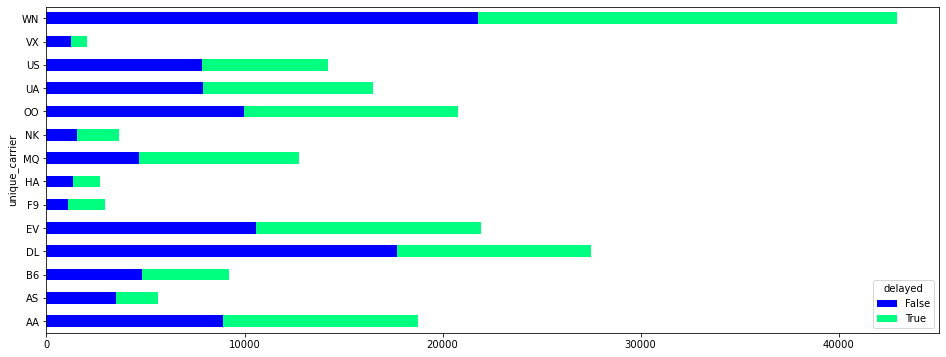

In [27]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

#### Customizing plots with .plot() parameters

A list of common parameters to customize plots in a number of ways:

Parameter | Arguments
:-------|:----------
kind= | 'line', 'bar', 'barh', 'hist', 'box', 'area', 'scatter'
figsize= | (width, height) in inches
colormap= | a long list of color palettes, including: 'autumn', 'winter', 'summer'
title= | a string
stacked= | stack the values vertically (instead of allowing them to overlap)

Here's the [full list](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) of plot parameters for DataFrames.

#### Practice Problem

How many flights were delayed longer than 20 minutes?

**Bonus Question:** What proportion of delayed flights does this represent?

In [51]:
# Find flights delayed longer than 20 minutes
data['delayed_20min'] = data['arr_delay'].apply(lambda x: x > 20)

In [63]:
delayed_counts = data['delayed_20min'].value_counts()
delayed_counts

False    152985
True      48679
Name: delayed_20min, dtype: int64

In [65]:
print(delayed_counts[1], 'flights were delayed longer than 20 minutes.')

48679 flights were delayed longer than 20 minutes.


In [66]:
# Flights delayed for more than 20 minutes as a proportion of all delayed flights
print('Proportion:', delayed_counts[1]/float(delayed_counts[0] + delayed_counts[1]) * 100, '%')

Proportion: 24.138666296413838 %


### Pivot tables

> A pivot table is composed of counts, sums, or other aggregations derived from a table of data.

We define **how values are grouped** by:
* `index=` ('Rows' in Excel)
* `columns=`

We define **which values are summarized** by:
* `values=` the name of the column of values to be aggregated in the ultimate table, then grouped by the Index and Columns and aggregated according to the Aggregation Function

We define **how values are summarized** by:
* `aggfunc=` (Aggregation Function) how rows are summarized, such as `sum`, `mean`, or `count`

**Example:**

Create a `.pivot_table()` of the number of flights each carrier flew on each day:

In [68]:
flights_by_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flights_by_carrier.head()

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03 00:00:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04 00:00:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
2015-01-05 00:00:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
2015-01-06 00:00:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396


`.pivot_table()` does not need all four arguments, because it has some smart defaults. If we pivot on one column, it will default to using all other numeric columns as the index (rows) and take the average of the values. For example, if we want to pivot and summarize on `flight_date`:

In [69]:
data.pivot_table(columns='flight_date')

flight_date,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,2015-01-11 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00
actual_elapsed_time,141.688442,145.950033,145.111664,140.607814,137.699987,136.297427,138.249851,137.045859,137.876833,138.712463,139.096045,134.649796,133.110117
all_delayed_flights,0.500209,0.648050,0.679244,0.548707,0.544695,0.483912,0.419639,0.468328,0.345917,0.436424,0.551360,0.382279,0.302835
arr_delay,9.838904,25.461860,31.975011,18.811310,21.299274,11.955429,13.316482,12.255611,1.922475,10.187042,18.563998,3.162599,-0.817102
cancelled,0.015352,0.021446,0.026480,0.026287,0.025792,0.019459,0.050784,0.029298,0.015392,0.023993,0.027442,0.012978,0.011469
carrier_delay,16.668783,18.023806,18.213584,17.986333,16.751224,15.317566,19.767890,18.768564,25.002997,17.142741,15.063235,18.112939,22.049189
delayed,0.216116,0.375988,0.417564,0.284143,0.311851,0.230749,0.197889,0.220515,0.127592,0.204487,0.285436,0.138274,0.092461
delayed_20min,0.216116,0.375988,0.417564,0.284143,0.311851,0.230749,0.197889,0.220515,0.127592,0.204487,0.285436,0.138274,0.092461
distance,839.785915,848.749320,838.077666,820.224801,784.111329,785.939182,792.963770,793.554910,830.779650,809.407279,791.471614,779.262121,782.294072
flight_num,2284.698047,2287.225541,2268.050514,2233.375030,2238.016324,2237.701561,2238.148479,2237.685657,2484.358312,2271.538701,2246.031407,2249.280171,2241.273711
late_aircraft_delay,21.317207,26.525643,31.864547,26.294995,28.462557,22.112744,26.855823,26.280862,17.287712,26.642197,25.970956,19.288743,18.260073


In the table above, we get the average of values by day, across all numeric columns.

#### Reasons for delays

**Example**

What were the most common reasons for flight delays? To find out, we can pivot on the date and type of delay, `delays_list`, summing the number of minutes of each type of delay:

In [72]:
delays_list = ['carrier_delay', 'weather_delay', 'late_aircraft_delay', 'nas_delay', 'security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', values=delays_list, aggfunc='sum')
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03 00:00:00,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04 00:00:00,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05 00:00:00,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06 00:00:00,92383.0,156971.0,94990.0,372.0,26299.0
2015-01-07 00:00:00,66708.0,96301.0,64607.0,165.0,17763.0
2015-01-08 00:00:00,74861.0,101703.0,70006.0,510.0,33015.0
2015-01-09 00:00:00,80123.0,112193.0,50703.0,182.0,15076.0
2015-01-10 00:00:00,50056.0,34610.0,13958.0,116.0,5683.0


The results in this above table are the **sum of minutes delayed, by type of delay, by day**.

An area chart, or a **stacked accumulation of counts**, can be used to illustrate the relative contribution of delays. The arguments used are `kind='area'` and `stacked=True` to create the stacked area chart, `colormap='autumn'` for a vibrant color, and `figsize=[16,6]` to make it bigger: 

<AxesSubplot:xlabel='flight_date'>

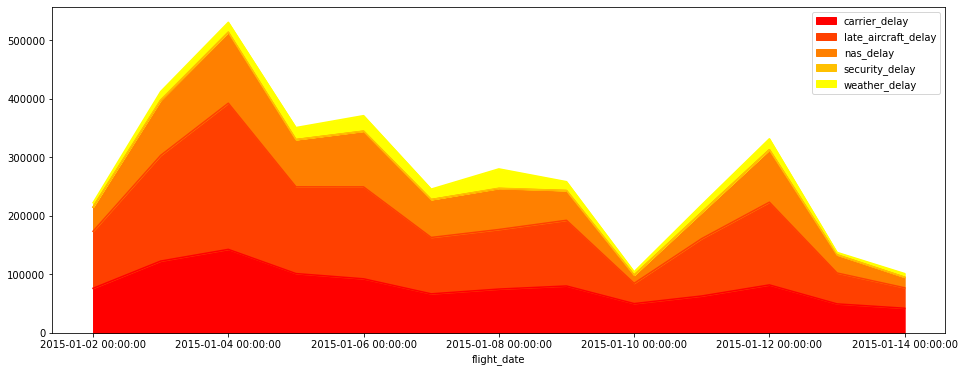

In [75]:
flight_delays_by_day.plot(kind='area', stacked=True, figsize=[16,6], colormap='autumn')

From the above, we see a large number of delays on the 4th and 12th of January. One hypothesis is that snow kept planes grounded and unable to continue their routes.

#### Practice Problem

Which airlines contributed most to the sum total minutes of delay? Pivot the daily sum of delay minutes by airline. Plot the delays as a stacked bar chart.

In [79]:
carrier_delay_by_day = data.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay', aggfunc='sum')
carrier_delay_by_day

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,31662.0,3327.0,-610.0,-598.0,10932.0,4100.0,6862.0,20853.0,3512.0,22126.0,16136.0,1491.0,251.0,41865.0
2015-01-03 00:00:00,44306.0,3544.0,15540.0,23227.0,60815.0,10470.0,5835.0,34197.0,9153.0,44507.0,33444.0,15949.0,54.0,82160.0
2015-01-04 00:00:00,55031.0,4713.0,27772.0,37912.0,68259.0,15964.0,593.0,59723.0,10905.0,53947.0,42736.0,23439.0,2478.0,104515.0
2015-01-05 00:00:00,36926.0,1068.0,15352.0,-2729.0,50879.0,8285.0,1526.0,51880.0,13846.0,42581.0,23547.0,7904.0,447.0,50861.0
2015-01-06 00:00:00,19229.0,1400.0,26638.0,20290.0,35635.0,6538.0,-68.0,35282.0,9196.0,20889.0,25744.0,30486.0,1406.0,84183.0
2015-01-07 00:00:00,16768.0,693.0,10739.0,-3339.0,25530.0,8872.0,-206.0,34908.0,6607.0,24114.0,25984.0,6559.0,740.0,24160.0
2015-01-08 00:00:00,20155.0,317.0,1315.0,10261.0,31355.0,5307.0,705.0,30923.0,4805.0,33784.0,34664.0,7038.0,-405.0,21028.0
2015-01-09 00:00:00,15352.0,-1889.0,21273.0,10059.0,28640.0,8272.0,937.0,28744.0,5567.0,33315.0,31470.0,4047.0,529.0,3695.0
2015-01-10 00:00:00,9599.0,-2911.0,194.0,-10591.0,2539.0,2983.0,67.0,9040.0,2324.0,9607.0,4702.0,-2470.0,-628.0,-1120.0


<AxesSubplot:title={'center':'Total Arrival Delay in Minutes'}, xlabel='flight_date'>

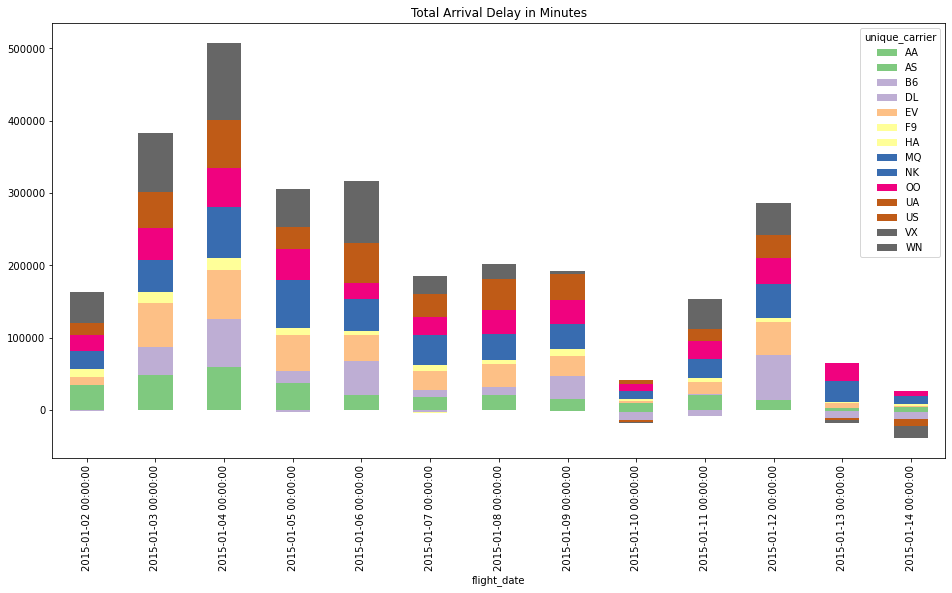

In [83]:
carrier_delay_by_day.plot(kind='bar', stacked=True, figsize=[16,8], colormap='Accent', title='Total Arrival Delay in Minutes')